In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

SEEDS = [5,26,47,76,92]

ENVIRONMENT_NAME = "MOHumanoidDR-v5" # CHANGE THIS TO THE NAME OF THE ENVIRONMENT
METRIC = "NHGR" # CHANGE THIS TO THE DESIRED METRIC

In [32]:
ALGORITHMS = ['MORL-D(MOSAC)-SB+PSA', 'MORL-D(MOSAC)-SB', 'GPI-PD Continuous Action', 'GPI-LS Continuous Action', 'PGMORL', 'CAPQL', 'PCN continuous action', 'SAC Continuous Action']
ENVIRONMENTS = {
    "MOHopperDR-v5": ["MOHopperDefault-v5","MOHopperLight-v5","MOHopperHeavy-v5","MOHopperSlippery-v5","MOHopperLowDamping-v5","MOHopperHard-v5"],
    "MOHalfCheetahDR-v5": ["MOHalfCheetahDefault-v5","MOHalfCheetahLight-v5","MOHalfCheetahHeavy-v5","MOHalfCheetahSlippery-v5","MOHalfCheetahHard-v5"],
    "MOHumanoidDR-v5": ["MOHumanoidDefault-v5","MOHumanoidLight-v5","MOHumanoidHeavy-v5","MOHumanoidLowDamping-v5","MOHumanoidHard-v5"],
    "MOLunarLanderDR-v0": ["MOLunarLanderDefault-v0","MOLunarLanderHighGravity-v0","MOLunarLanderWindy-v0","MOLunarLanderTurbulent-v0","MOLunarLanderHard-v0"],
}
ALGORITHMS_NAME_MAP = {
    'PCN continuous action': 'PCN',
    'PGMORL': 'PGMORL',
    'CAPQL': 'CAPQL',
    'GPI-LS Continuous Action': 'GPI-LS',
    'GPI-PD Continuous Action': 'GPI-PD',
    'MORL-D(MOSAC)-SB': 'MORL-D(SB)',
    'MORL-D(MOSAC)-SB+PSA': 'MORL-D(SB+PSA)',
    'SAC Continuous Action': 'SAC'
}

colors = sns.color_palette('colorblind')
ALGORITHMS_COLOR_MAP = {
    'CAPQL': colors[1],
    'GPI-LS': colors[3],
    'GPI-PD': colors[4],
    'MORL-D(SB)': colors[5],
    'MORL-D(SB+PSA)': colors[0],
    'PGMORL': colors[2],
    'PCN': colors[8],
    'SAC': colors[7]
}

In [33]:
def load_scores(env_id, algorithms, seeds, metric):
    envs = ENVIRONMENTS[env_id]
    scores = {}
    for algorithm in algorithms:
        algorithm_name = ALGORITHMS_NAME_MAP[algorithm]
        scores[algorithm_name] = {}
        for env in envs:
            for seed in seeds:
                df = pd.read_csv(f"data/scores/{env_id}/{algorithm}/seed_{seed}.csv")
                metric_values = df[metric + f"/{env}"].values
                scores[algorithm_name].setdefault(env, []).extend(metric_values)
    return scores

def convert_to_matrix(score_dict):
    keys = sorted(list(score_dict.keys()))
    return np.stack([score_dict[k] for k in keys], axis=1)

In [34]:
scores_dict = load_scores(ENVIRONMENT_NAME, ALGORITHMS, SEEDS, METRIC)
for algo in scores_dict.keys():
    scores_dict[algo] = convert_to_matrix(scores_dict[algo])
scores_dict

{'MORL-D(SB+PSA)': array([[0.32698384, 0.32698384, 0.32698384, 0.32698384, 0.32698384],
        [0.38579502, 0.38579502, 0.38579502, 0.38579502, 0.38579502],
        [0.40853205, 0.40853205, 0.40853205, 0.40853205, 0.40853205],
        [0.31906274, 0.31906274, 0.31906274, 0.31906274, 0.31906274],
        [0.33628025, 0.33628025, 0.33628025, 0.33628025, 0.33628025]]),
 'MORL-D(SB)': array([[0.26376012, 0.26376012, 0.26376012, 0.26376012, 0.26376012],
        [0.28393135, 0.28393135, 0.28393135, 0.28393135, 0.28393135],
        [0.412857  , 0.412857  , 0.412857  , 0.412857  , 0.412857  ],
        [0.29496481, 0.29496481, 0.29496481, 0.29496481, 0.29496481],
        [0.28901072, 0.28901072, 0.28901072, 0.28901072, 0.28901072]]),
 'GPI-PD': array([[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.00221992, 0.00221992, 0.00221992, 0.00221992, 0.00221992],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.0005521 , 0.0005521 , 0.0005521 ,

Best algorithm: CAPQL


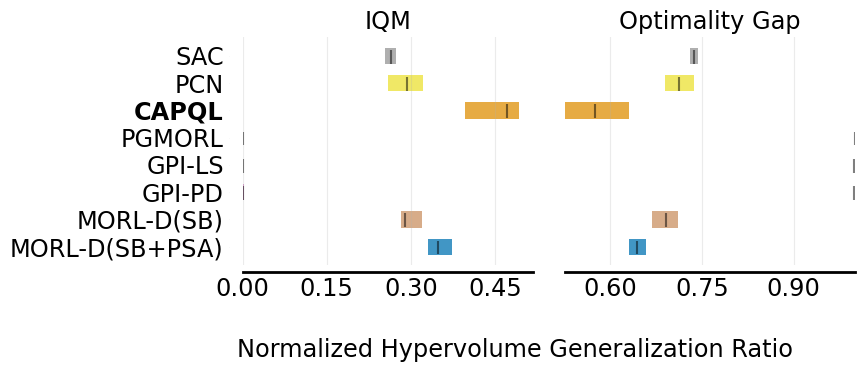

Aggregate scores: {'MORL-D(SB+PSA)': array([0.34865513, 0.64466922]), 'MORL-D(SB)': array([0.28927986, 0.6910952 ]), 'GPI-PD': array([8.95401513e-04, 9.98933471e-01]), 'GPI-LS': array([0.00114322, 0.99885656]), 'PGMORL': array([0., 1.]), 'CAPQL': array([0.47079201, 0.57479696]), 'PCN': array([0.29248637, 0.71238427]), 'SAC': array([0.26445746, 0.73715965])}
Aggregate interval estimates: {'MORL-D(SB+PSA)': array([[0.32984427, 0.63054626],
       [0.37293831, 0.65828102]]), 'MORL-D(SB)': array([[0.28190117, 0.66922476],
       [0.31948994, 0.71046927]]), 'GPI-PD': array([[2.12348039e-04, 9.98496517e-01],
       [1.70674875e-03, 9.99356797e-01]]), 'GPI-LS': array([[0.00114148, 0.99885541],
       [0.00114517, 0.99885768]]), 'PGMORL': array([[0., 1.],
       [0., 1.]]), 'CAPQL': array([[0.39670658, 0.52546128],
       [0.49228241, 0.63097651]]), 'PCN': array([[0.25926604, 0.6890849 ],
       [0.32113293, 0.73638368]]), 'SAC': array([[0.25343923, 0.730253  ],
       [0.27405741, 0.74423074]

In [35]:
from rliable import library as rly
from rliable import metrics
from helpers.rliable import plot_interval_estimates

IQM = lambda x: metrics.aggregate_iqm(x)                    # Interquartile Mean
OG = lambda x: metrics.aggregate_optimality_gap(x, 1.0)     # Optimality Gap

aggregate_func = lambda x: np.array([IQM(x), OG(x)])
aggregate_scores, aggregate_interval_estimates = rly.get_interval_estimates(
    scores_dict, aggregate_func, reps=50000)

fig, axes = plot_interval_estimates(
    aggregate_scores, 
    aggregate_interval_estimates,
    metric_names = ['IQM', 'Optimality Gap'],
    algorithms=list(scores_dict.keys()),
    colors=ALGORITHMS_COLOR_MAP,
    xlabel_y_coordinate=-0.2,
    bold_best=True, # Bold the best algorithm
    # subfigure_width=3.6,
    # max_ticks=3,
    xlabel='Normalized Hypervolume Generalization Ratio')

plt.savefig(f'images/{ENVIRONMENT_NAME}_{METRIC}_IQM_OG.png', format='png', bbox_inches='tight')
plt.show()

print("Aggregate scores:", aggregate_scores)
print("Aggregate interval estimates:", aggregate_interval_estimates)

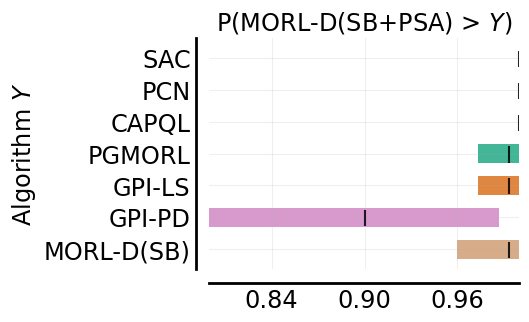

In [15]:
from matplotlib.ticker import MaxNLocator
from rliable import plot_utils

all_pairs = {}
best_algo = 'MORL-D(SB+PSA)'
for alg_y in (scores_dict.keys()):
  if alg_y == best_algo:
    continue
  pair_name = f'{best_algo},{alg_y}'
  all_pairs[pair_name] = (scores_dict[best_algo], scores_dict[alg_y]) 

probabilities, probability_cis = {}, {}
probabilities, probability_cis = rly.get_interval_estimates(all_pairs, metrics.probability_of_improvement, reps=2000)

fig, ax = plt.subplots(figsize=(4, 3))
h = 0.6
algorithm_labels = []

for i, (alg_pair, prob) in enumerate(probabilities.items()):
  _, alg1 = alg_pair.split(',')
  algorithm_labels.append(alg1)
  (l, u) = probability_cis[alg_pair]
  ax.barh(y=i, width=u-l, height=h, left=l, color=ALGORITHMS_COLOR_MAP[alg1], alpha=0.75)
  ax.vlines(x=prob, ymin=i-7.5 * h/16, ymax=i+(6*h/16), color='k', alpha=0.85)
ax.set_yticks(range(len(algorithm_labels)))
ax.set_yticklabels(algorithm_labels)


ax.set_title(fr'P({best_algo} > $Y$)', size='xx-large')
plot_utils._annotate_and_decorate_axis(ax, labelsize='xx-large', ticklabelsize='xx-large')
ax.set_ylabel(r'Algorithm $Y$', size='xx-large')
ax.xaxis.set_major_locator(MaxNLocator(4))
fig.subplots_adjust(wspace=0.25, hspace=0.45)

plt.savefig(f'images/{ENVIRONMENT_NAME}_PROB_IMPROVEMENT.png', format='png', bbox_inches='tight')
plt.show()